In [156]:
import pandas as pd
import requests
from datetime import datetime
import random
from random import sample
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor # import the random forest model
from sklearn import preprocessing # used for label encoding and imputing NaNs

#Stats package has API module for Cross-sectional models and methods
import statsmodels.api as sm # What does this do? Find out and type here.

#Stats package has graphics module for plotting regression lines given an intercept and slope.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.

#Sklearn package metrics that has functions like MSE and R2 to measure performance (or "goodness"/fit) of classification/regression
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.

#Sklearn package that splits data into random train and test subsets
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.


import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [157]:
df = pd.read_csv('311 sample.csv', parse_dates=['Created Date','Closed Date','Resolution Action Updated Date','date convert'], index_col=0, drop)
df.head()

/Users/LJ/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,18,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,date convert
0,41922719,2019-03-10 09:04:50,2019-03-10 10:56:08,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,10465,3262 COUNTRY CLUB ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.840824,-73.820398,"(40.84082357187632, -73.82039786067833)",2019-03-10 09:04:50
1,41923874,2019-03-10 11:40:24,2019-03-10 11:58:03,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11375,102-12 65 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.730501,-73.852609,"(40.730500628686194, -73.852608933943)",2019-03-10 11:40:24
2,41924382,2019-03-10 09:41:32,2019-03-10 13:31:54,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10029,210 EAST 102 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.788826,-73.946174,"(40.7888258501448, -73.94617411312863)",2019-03-10 09:41:32
3,41924441,2019-03-10 11:21:15,2019-03-11 11:33:58,DCA,Department of Consumer Affairs,Consumer Complaint,Contract Dispute,NaN,11226,1469 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.650365,-73.949515,"(40.65036524649105, -73.9495147975753)",2019-03-10 11:21:15
4,41925545,2019-03-12 00:32:22,2019-03-12 02:03:41,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11369,31-02 91 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.759858,-73.877631,"(40.759857615752665, -73.87763136792162)",2019-03-12 00:32:22


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      100000 non-null  int64         
 1   Created Date                    100000 non-null  datetime64[ns]
 2   Closed Date                     97300 non-null   datetime64[ns]
 3   Agency                          100000 non-null  object        
 4   Agency Name                     100000 non-null  object        
 5   Complaint Type                  100000 non-null  object        
 6   Descriptor                      98713 non-null   object        
 7   Location Type                   75137 non-null   object        
 8   Incident Zip                    94288 non-null   object        
 9   Incident Address                81528 non-null   object        
 10  Street Name                     81522 non-null   object  

In [159]:
df.insert(3,"Resolution Time", df['Closed Date']-df['Created Date'])

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      100000 non-null  int64          
 1   Created Date                    100000 non-null  datetime64[ns] 
 2   Closed Date                     97300 non-null   datetime64[ns] 
 3   Resolution Time                 97300 non-null   timedelta64[ns]
 4   Agency                          100000 non-null  object         
 5   Agency Name                     100000 non-null  object         
 6   Complaint Type                  100000 non-null  object         
 7   Descriptor                      98713 non-null   object         
 8   Location Type                   75137 non-null   object         
 9   Incident Zip                    94288 non-null   object         
 10  Incident Address                81528 non-nul

In [161]:
#Convert dates into a days since min date of column
min_created = min(df['Created Date'])
df['Created_tonum'] = (df['Created Date'] - min_created).dt.days.astype(float)
df[['Created Date', 'Created_tonum']].head()
#df.drop('Created Date', axis = 1, inplace = True)

,Created Date,Created_tonum
0,2019-03-10 09:04:50,3355.0
1,2019-03-10 11:40:24,3355.0
2,2019-03-10 09:41:32,3355.0
3,2019-03-10 11:21:15,3355.0
4,2019-03-12 00:32:22,3357.0


In [162]:
min_closed = min(df['Closed Date'])
df['Closed_tonum'] = (df['Closed Date'] - min_closed).dt.days.astype(float)
df[['Closed Date', 'Closed_tonum']].head()

,Closed Date,Closed_tonum
0,2019-03-10 10:56:08,43532.0
1,2019-03-10 11:58:03,43532.0
2,2019-03-10 13:31:54,43532.0
3,2019-03-11 11:33:58,43533.0
4,2019-03-12 02:03:41,43534.0


In [190]:
min_resupdt = min(df['Resolution Action Updated Date'])
df['Resupdt_tonum'] = (df['Resolution Action Updated Date'] - min_resupdt).dt.days.astype(float)
df[['Resolution Action Updated Date', 'Resupdt_tonum']].head()

,Resolution Action Updated Date,Resupdt_tonum
0,2019-03-10 10:56:08,3371.0
1,2019-03-10 11:58:03,3372.0
2,2019-03-10 13:31:54,3372.0
3,2019-03-11 11:33:58,3373.0
4,2019-03-12 02:03:41,3373.0


In [164]:
df.info()  #unique key is not continuous so should not be included in the regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      100000 non-null  int64          
 1   Created Date                    100000 non-null  datetime64[ns] 
 2   Closed Date                     97300 non-null   datetime64[ns] 
 3   Resolution Time                 97300 non-null   timedelta64[ns]
 4   Agency                          100000 non-null  object         
 5   Agency Name                     100000 non-null  object         
 6   Complaint Type                  100000 non-null  object         
 7   Descriptor                      98713 non-null   object         
 8   Location Type                   75137 non-null   object         
 9   Incident Zip                    94288 non-null   object         
 10  Incident Address                81528 non-nul

In [192]:
test_created = df['Created Date'].iloc[0]
test_closed = df['Closed Date'].iloc[0]
test_created, test_closed

(Timestamp('2019-03-10 09:04:50'), Timestamp('2019-03-10 10:56:08'))

In [196]:
test_delta = test_closed-test_created
test_delta

Timedelta('0 days 01:51:18')

In [198]:
test_delta.total_seconds()

6678.0

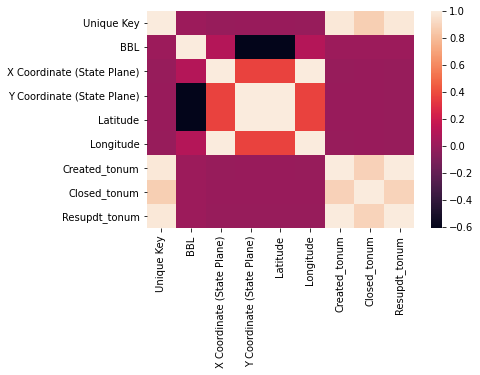

In [165]:
sns.heatmap(df.corr())

In [174]:
df.corr() #All correlations make sense.  we don't need to include the coordinate AND long/lat because they are the same thing

,Unique Key,BBL,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Created_tonum,Closed_tonum,Resupdt_tonum
Unique Key,1.000000,0.013981,-0.003113,-0.000031,-0.000027,-0.003115,0.983655,0.876149,0.982024
BBL,0.013981,1.000000,0.101136,-0.610407,-0.610772,0.100809,0.013472,0.015661,0.016743
X Coordinate (State Plane),-0.003113,0.101136,1.000000,0.366964,0.366473,0.999999,-0.003144,-0.000328,-0.004804
Y Coordinate (State Plane),-0.000031,-0.610407,0.366964,1.000000,1.000000,0.368005,0.000641,0.001809,-0.001597
Latitude,-0.000027,-0.610772,0.366473,1.000000,1.000000,0.367513,0.000645,0.001809,-0.001594
Longitude,-0.003115,0.100809,0.999999,0.368005,0.367513,1.000000,-0.003144,-0.000323,-0.004802
Created_tonum,0.983655,0.013472,-0.003144,0.000641,0.000645,-0.003144,1.000000,0.890589,0.997678
Closed_tonum,0.876149,0.015661,-0.000328,0.001809,0.001809,-0.000323,0.890589,1.000000,0.897302
Resupdt_tonum,0.982024,0.016743,-0.004804,-0.001597,-0.001594,-0.004802,0.997678,0.897302,1.000000


In [184]:
modeldf = df[['BBL','Latitude','Longitude','Created_tonum','Closed_tonum','Resupdt_tonum']].dropna()
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72518 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BBL            72518 non-null  float64
 1   Latitude       72518 non-null  float64
 2   Longitude      72518 non-null  float64
 3   Created_tonum  72518 non-null  float64
 4   Closed_tonum   72518 non-null  float64
 5   Resupdt_tonum  72518 non-null  float64
dtypes: float64(6)
memory usage: 3.9 MB


In [203]:
# Subsetting our data into our dependent and independent variables.
X = modeldf[['BBL','Latitude','Longitude','Created_tonum']]
y = modeldf['Resupdt_tonum']

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [200]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72518 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BBL            72518 non-null  float64
 1   Latitude       72518 non-null  float64
 2   Longitude      72518 non-null  float64
 3   Created_tonum  72518 non-null  float64
dtypes: float64(4)
memory usage: 2.8 MB


In [201]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(54388, 4) (18130, 4) (54388, 1) (18130, 1)


In [204]:
model1 = RandomForestRegressor()
results = model1.fit(X_train, y_train)
results.score(X_test,y_test)

0.995278419585656

In [ ]:
def rmse(test,pred):
    return np.sqrt(mean_squared_error(test,pred))

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   BBL            75016 non-null   float64
 1   Latitude       91112 non-null   float64
 2   Longitude      91112 non-null   float64
 3   Created_tonum  100000 non-null  float64
 4   Closed_tonum   97300 non-null   float64
dtypes: float64(5)
memory usage: 4.6 MB
